<a href="https://colab.research.google.com/github/rpdieego/AirBNB/blob/master/Airbnb_Boston_Seattle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![alt text](https://github.com/rpdieego/AirBNB/blob/master/jupter_notebook_image.jpg?raw=true)

#**Business Understanding**

Sources:
[Airbnb Help Center](https://www.airbnb.com/help/article/2503/what-is-airbnb-and-how-does-it-work?_set_bev_on_new_domain=1584377680_%2BeaHRDy0emDmjwl1&locale=en), 
[Home BT](https://home.bt.com/lifestyle/travel/travel-advice/what-is-airbnb-11363981595930)


**What is Airbnb and how does it work?**

Airbnb began in 2008, when two designers who had space to share in there home hosted three travelers which were looking for a place to stay. Now, milions of hosts and travelers are able to create a free Airbnb account and list their spaces and book unique accomodations anywhere in the world.

Airbnb takes 3 % commission of every booking from hosts, and between 6% and 12% from guests.

There's plenty of criteria to list for/search a property: from a shared room to an entire house, to having a swimming pool to having a washing machine ...


Airbnb services:

*   Personal profiles and listings verified by Airbnb;
*   Smart messaging system in which hosts and guests can communicate with certainty;
*   Trusted platform to collect and transfer payments;
*   24/7 support with a global community support team (11 different languages)



**Datasets**

 Airbnb is available all arround the world. However, we have here data regarding the listings on the American cities of: Boston, MA and Seattle, WA.


 **Questions**

The goal of this notebook is to compare some caractheristics regarding the listings and hosts of each city, in order to understand which one is more likely to provide a better Airbnb experience to the guests.

I'm going to use the following questions to derive my conclusions:

*   (1) Is there a specific host profile to each city?

*   (2) Which city is cheaper for a one night booking?

*   (3) Which city has the best properties available (based on the guest reviews)?




# **Data Understanding**

In [0]:
#import relevant libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
# Opening the Dataframes using PanDas

url_boston = 'https://raw.githubusercontent.com/rpdieego/AirBNB/master/listings_Boston.csv'
url_seattle = 'https://raw.githubusercontent.com/rpdieego/AirBNB/master/listings_Seattle.csv'

boston_df = pd.read_csv(url_boston)
seattle_df = pd.read_csv(url_seattle)

# Checking the dimensions of the datasets

print("Boston dataset \n Variables: \t {} \n Inputs: \t{}".format(boston_df.shape[1], boston_df.shape[0]))
print("\n")
print("Seattle dataset \n Variables: \t {} \n Inputs: \t{}".format(seattle_df.shape[1], seattle_df.shape[0]))

Boston dataset 
 Variables: 	 95 
 Inputs: 	3585


Seattle dataset 
 Variables: 	 92 
 Inputs: 	3818


The Boston dataset has three extra features compared to the Seattle. I'm going to dive into this at the data dictionary.

In [4]:
#numeric features statistical summary (Boston)
boston_df.describe()

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,neighbourhood_group_cleansed,latitude,longitude,accommodates,bathrooms,bedrooms,beds,square_feet,guests_included,minimum_nights,maximum_nights,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,jurisdiction_names,calculated_host_listings_count,reviews_per_month
count,3.585000e+03,3.585000e+03,3.585000e+03,3585.000000,3585.000000,0.0,3585.000000,3585.000000,3585.000000,3571.000000,3575.000000,3576.000000,56.000000,3585.000000,3585.000000,3.585000e+03,0.0,3585.00000,3585.000000,3585.000000,3585.000000,3585.000000,2772.000000,2762.000000,2767.000000,2765.000000,2767.000000,2763.000000,2764.000000,0.0,0.0,3585.000000,2829.000000
mean,8.440875e+06,2.016091e+13,2.492311e+07,58.902371,58.902371,NaN,42.340032,-71.084818,3.041283,1.221647,1.255944,1.609060,858.464286,1.429847,3.171269,2.872584e+04,NaN,8.64993,21.833194,38.558159,179.346444,19.044630,91.916667,9.431571,9.258041,9.646293,9.646549,9.414043,9.168234,NaN,NaN,12.733891,1.970908
std,4.500787e+06,8.516813e-01,2.292781e+07,171.119663,171.119663,NaN,0.024403,0.031565,1.778929,0.501487,0.753060,1.011745,608.874310,1.056787,8.874133,1.670136e+06,NaN,10.43533,21.860966,33.158272,142.136180,35.571658,9.531686,0.931863,1.168977,0.762753,0.735507,0.903436,1.011116,NaN,NaN,29.415076,2.120561
min,3.353000e+03,2.016091e+13,4.240000e+03,0.000000,0.000000,NaN,42.235942,-71.171789,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000e+00,NaN,0.00000,0.000000,0.000000,0.000000,0.000000,20.000000,2.000000,2.000000,2.000000,4.000000,2.000000,2.000000,NaN,NaN,1.000000,0.010000
25%,4.679319e+06,2.016091e+13,6.103425e+06,1.000000,1.000000,NaN,42.329995,-71.105083,2.000000,1.000000,1.000000,1.000000,415.000000,1.000000,1.000000,3.650000e+02,NaN,0.00000,0.000000,0.000000,19.000000,1.000000,89.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,NaN,NaN,1.000000,0.480000
50%,8.577620e+06,2.016091e+13,1.928100e+07,2.000000,2.000000,NaN,42.345201,-71.078429,2.000000,1.000000,1.000000,1.000000,825.000000,1.000000,2.000000,1.125000e+03,NaN,4.00000,16.000000,37.000000,179.000000,5.000000,94.000000,10.000000,10.000000,10.000000,10.000000,10.000000,9.000000,NaN,NaN,2.000000,1.170000
75%,1.278953e+07,2.016091e+13,3.622147e+07,7.000000,7.000000,NaN,42.354685,-71.062155,4.000000,1.000000,2.000000,2.000000,1200.000000,1.000000,3.000000,1.125000e+03,NaN,15.00000,40.000000,68.000000,325.000000,21.000000,98.250000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,NaN,6.000000,2.720000
max,1.493346e+07,2.016091e+13,9.385411e+07,749.000000,749.000000,NaN,42.389982,-71.000100,16.000000,6.000000,5.000000,16.000000,2400.000000,14.000000,300.000000,1.000000e+08,NaN,30.00000,60.000000,90.000000,365.000000,404.000000,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,NaN,136.000000,19.150000


In [5]:
# numeric features statistical summary (Seattle)
seattle_df.describe()

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,beds,square_feet,guests_included,minimum_nights,maximum_nights,availability_30,availability_60,availability_90,availability_365,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,calculated_host_listings_count,reviews_per_month
count,3.818000e+03,3.818000e+03,3.818000e+03,3816.000000,3816.000000,3818.000000,3818.000000,3818.000000,3802.000000,3812.000000,3817.000000,97.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3171.000000,3160.000000,3165.000000,3160.000000,3167.000000,3163.000000,3162.000000,0.0,3818.000000,3191.000000
mean,5.550111e+06,2.016010e+13,1.578556e+07,7.157757,7.157757,47.628961,-122.333103,3.349398,1.259469,1.307712,1.735394,854.618557,1.672603,2.369303,780.447617,16.786276,36.814825,58.082504,244.772656,22.223415,94.539262,9.636392,9.556398,9.786709,9.809599,9.608916,9.452245,NaN,2.946307,2.078919
std,2.962660e+06,0.000000e+00,1.458382e+07,28.628149,28.628149,0.043052,0.031745,1.977599,0.590369,0.883395,1.139480,671.404893,1.311040,16.305902,1683.589007,12.173637,23.337541,34.063845,126.772526,37.730892,6.606083,0.698031,0.797274,0.595499,0.568211,0.629053,0.750259,NaN,5.893029,1.822348
min,3.335000e+03,2.016010e+13,4.193000e+03,1.000000,1.000000,47.505088,-122.417219,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000,2.000000,3.000000,2.000000,2.000000,4.000000,2.000000,NaN,1.000000,0.020000
25%,3.258256e+06,2.016010e+13,3.275204e+06,1.000000,1.000000,47.609418,-122.354320,2.000000,1.000000,1.000000,1.000000,420.000000,1.000000,1.000000,60.000000,2.000000,13.000000,28.000000,124.000000,2.000000,93.000000,9.000000,9.000000,10.000000,10.000000,9.000000,9.000000,NaN,1.000000,0.695000
50%,6.118244e+06,2.016010e+13,1.055814e+07,1.000000,1.000000,47.623601,-122.328874,3.000000,1.000000,1.000000,1.000000,750.000000,1.000000,2.000000,1125.000000,20.000000,46.000000,73.000000,308.000000,9.000000,96.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,1.000000,1.540000
75%,8.035127e+06,2.016010e+13,2.590309e+07,3.000000,3.000000,47.662694,-122.310800,4.000000,1.000000,2.000000,2.000000,1200.000000,2.000000,2.000000,1125.000000,30.000000,59.000000,89.000000,360.000000,26.000000,99.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,2.000000,3.000000
max,1.034016e+07,2.016010e+13,5.320861e+07,502.000000,502.000000,47.733358,-122.240607,16.000000,8.000000,7.000000,15.000000,3000.000000,15.000000,1000.000000,100000.000000,30.000000,60.000000,90.000000,365.000000,474.000000,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,37.000000,12.150000


# **Data Dictionary**

*   *id* - property id
*   *listing_url* - url of property page on the Air BNB website
*   *scrape_id* - id given for the scraping
*   *last_scraped* - date at the listing were scraped for the last time
*   *name* - listing title
*   *summary* - listing subtitle (short description)
*   *space* - listing description
*   *description* - as above
*   *experiences_offered* - list of experiences offered at the property
*   *neighborhood_overview* - neighbourhood short review
*   *notes* - aditional description
*   *transit* - notes regarding transportation how to get on the property
*   *access* (**Boston only**) - description of which parts of the property the user will have acces during their stay
*   *interaction* (**Boston only**) - description of the host interaction with the users
*   *house_rules* (**Boston only**) - description of the house rules
*   *thumbnail_url* - url to access the descriptions
*   *medium_url* - url to access the descriptions
*   *picture_url* url to access the listing picture
*   *xl_picture_url* - url to acess the listing large picture
*   *host_id* - host's id at Air BNB
*   *host_url* - url to access the host page at Air BNB website
*   *host_name* - host's name
*   *host_since* - date which the host has registred at Air BNB
*   *host_location* - host's home location
*   *host_about* - host's description
*   *host_response_time* - how much time a user has to wait before gettin an answer from the host 
*   *host_response_rate* - percentage of the messages answered by the host
*   *host_acceptance_rate* - percentage of booking requests accepted
*   *host_is_superhost* - informs if the host is rated as "superhost"
*   *host_thumbnail_url* - url to access host's description
*   *host_picture_url* -  url to access host's picture
*   *host_neighborhood* - nighbourhood in which the hosts live in
*   *host_listings_count* - number of listings registered by that host
*   *host_total_listings_count* - total number of listings registered by that host
*   *host_verifications* - types of verification the host provided
*   *host_has_profile_pic* - informs if the host has a profile picture 
*   *host_identity_verifies* - informs if the hosts identity were verified
*   *street* - street where the property is located
*   *neighbourhood_cleansed* - neighborhood where the property is located
*   *neighbourhood_group_cleansed* - neighbourhood group (if applicable)
*   *city* - city where the property is located
*   *state* - state where the property is located
*   *zipcode* - property's zipcode
*   *market* - which market does the location belongs
*   *smart_location* - City, State(XX)
*   *country_code* - code of the country where the property is located
*   *country* - Country where the property is located
*   *latitude* - latitude of the property's location
*   *longitude* - longitude of the property's location
*   *is_location_exact* - informs if the GPS location is accurate
*   *property_type* - type of property (House, appartment, etc)
*   *room_type* - type of room (private room, entire house, etc)
*   *accommodates* - how many people does the property accomodates
*   *bathrooms* - number of bathrooms
*   *bedrooms* - number of bedrooms
*   *beds* - number of beds
*   *bed_type* - type of bed (real bed, couch, etc)
*   *amenities* - facilities offered at the property
*   *square_feet* - property size in square feet
*   *price* - renting price
*   *weekly_price* - weekly renting price
*   *mountly_price* - mounthly renting price
*   *security_deposit* - security deposit value
*   *cleaning_fee* - cleaning fee value
*   *guests_included* - how many guests are included at the regular fee
*   *extra_people* - value of the fee to add extra guests
*   *minimum_nights* - minimum number of nights to stay
*   *maximum_nights* - maximum number of nights per stay
*   *calendar_updated* - last time the availability calendar has been updated
*   *has_availability* - informs if the listing is available for being booked
*   *availability_30* - number of nights the listing is available for the next 30 days
*   *availability_60* - number of nights the listing is available for the next 60 days
*   *availability_90* - number of nights the listing is available for the next 90 days
*   *availability_365* - number of nights the listing is available for the next 365 days
*   *calendar_last_scraped* - date at the availability calendar were scrapped for the last time
*   *number_of_reviews* - number of reviews for this particular property
*   *first_review* - Date of the first review
*   *last_review* - Date of the last review
*   *review_scores_rating* - Review score: Rating
*   *review_scores_accuracy* -  Review score: Accuracy
*   *review_scores_cleanliness* - Review score: Cleanliness
*   *review_scores_checkin* - Review score: Check in process
*   *review_scores_communication* - Review score: Communication
*   *review_scores_location* - Review score: Location
*   *review_scores_value* - Review score: Value
*   *requires_license* - Informs if license is required to book
*   *license* - type of license required
*   *jurisdiction_names* - jurisdisction names for the licenses
*   *instant_bookable* - informs if it's possible to book the listing intantly
*   *cancellation_policy* -description of cancellation policy
*   *require_guest_profile_picture* - informs if it's necessary to have a profile picture to book the listing
*   *require_guest_phone_verification* informs if it's necessary to have a confirmed phone to book the listing
*   *calculated_host_listings_count* - calculated number of listings under the host profile
*   *reviews_per_month* - average number of reviews per month



# **Question 1 - Is there a specific host profile to each city?**

**Number of registered hosts in each city**

In [3]:
#number of different hosts

nr_hosts_boston = len(boston_df['host_id'].unique())

nr_hosts_seattle = len(seattle_df['host_id'].unique())


print("Number of hosts in Boston:\t{} \nListing/Host ratio:\t\t{:.4f}".format(nr_hosts_boston,(boston_df.shape[0]/nr_hosts_boston)))
print("\n")
print("Number of hosts in Seattle:\t{} \nListing/Host ratio:\t\t{:.4f}".format(nr_hosts_seattle,(seattle_df.shape[0]/nr_hosts_seattle)))

Number of hosts in Boston:	2181 
Listing/Host ratio:		1.6437


Number of hosts in Seattle:	2751 
Listing/Host ratio:		1.3879


**Superhosts**

In [4]:
#Boston
boston_superhost = boston_df.groupby('host_is_superhost')['host_id'].unique()
nr_boston_superhost = len(boston_superhost[1])

#Seattle
seattle_superhost = seattle_df.groupby('host_is_superhost')['host_id'].unique()
nr_seattle_superhost = len(seattle_superhost[1])

print("Number of superhosts in Boston: {} \nSuperhost/Host ratio:\t\t{:.4f}".format(nr_boston_superhost,(nr_boston_superhost/nr_hosts_boston)))
print("\n")
print("Number of superhosts in Seattle: {} \nSuperhost/Host ratio:\t\t{:.4f}".format(nr_seattle_superhost,(nr_seattle_superhost/nr_hosts_seattle)))

Number of superhosts in Boston: 257 
Superhost/Host ratio:		0.1178


Number of superhosts in Seattle: 537 
Superhost/Host ratio:		0.1952


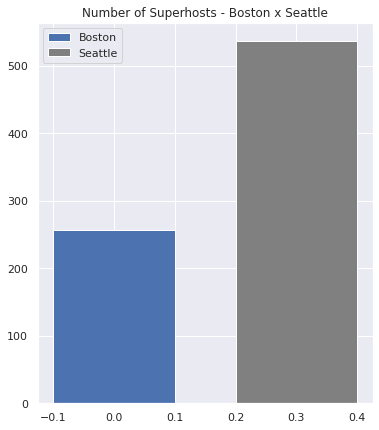

In [5]:
#grouped barplot (Superhosts )

sns.set()

#set the bar width
barWidth_sh = 0.2

#set the position of the bar on the x axis
r1_sh = 0
r2_sh = r1_sh + 1.5*barWidth_sh

#Make the plot
plt.figure(figsize=(6,7))
plt.title('Number of Superhosts - Boston x Seattle')
plt.bar(r1_sh,(nr_boston_superhost), width=barWidth_sh, label='Boston')
plt.bar(r2_sh,(nr_seattle_superhost), width=barWidth_sh, color='gray', label='Seattle')

# Add title and xticks
plt.xlabel('')

# Add legend and show graph
plt.legend()
plt.show()

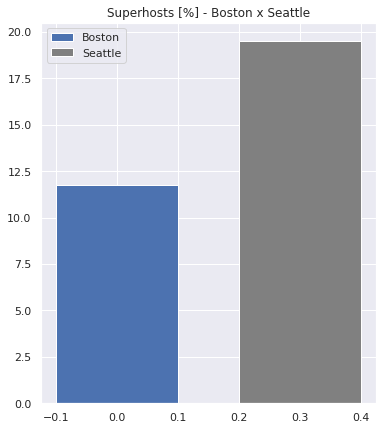

In [6]:
#grouped barplot (Superhosts %)

#set the bar width
barWidth_sh = 0.2

#set the position of the bar on the x axis
r1_sh = 0
r2_sh = r1_sh + 1.5*barWidth_sh 

#Make the plot
plt.figure(figsize=(6,7))
plt.title('Superhosts [%] - Boston x Seattle')
plt.bar(r1_sh,(nr_boston_superhost/nr_hosts_boston)*100, width=barWidth_sh, label='Boston')
plt.bar(r2_sh,(nr_seattle_superhost/nr_hosts_seattle)*100, width=barWidth_sh, color='gray', label='Seattle')

# Add title and xticks
plt.xlabel('')

# Add legend and show graph
plt.legend()
plt.show()

**Response Time**

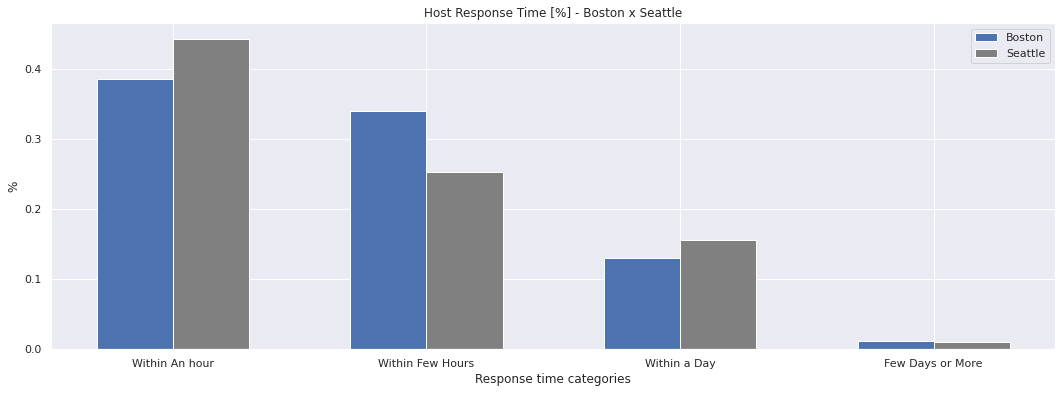

In [13]:
# % of response time in each city
boston_response_time = (boston_df['host_response_time'].value_counts())/boston_df.shape[0]
seatle_response_time = (seattle_df['host_response_time'].value_counts())/seattle_df.shape[0]

#grouped barplot (Host Response Time)

#set the bar width
barWidth = 0.3

#set the position of the bar on the x axis
r1 = np.arange(len(boston_response_time))
r2 = [x + barWidth for x in r1]

#Make the plot
plt.figure(figsize=(18,6))
plt.title('Host Response Time [%] - Boston x Seattle')
plt.bar(r1, boston_response_time, width=barWidth, edgecolor='white', label='Boston')
plt.bar(r2, seatle_response_time, width=barWidth, color='gray', edgecolor='white', label='Seattle')

# Add title and xticks
plt.xlabel('Response time categories')
plt.ylabel('%')
plt.xticks([r + (barWidth/2) for r in range(len(boston_response_time))],['Within An hour', 'Within Few Hours', 'Within a Day','Few Days or More'])

# Add legend and show graph
plt.legend()
plt.show()

In [70]:
# Exact percentages for response time (Boston)
boston_response_time

within an hour        0.386053
within a few hours    0.339749
within a day          0.130823
a few days or more    0.011994
Name: host_response_time, dtype: float64

In [71]:
# Exact percentages for response time (Seattle)
seatle_response_time

within an hour        0.443164
within a few hours    0.253536
within a day          0.156365
a few days or more    0.009953
Name: host_response_time, dtype: float64

**Response Rate**

In [0]:
# Converting the percentage objects to integers (Removing the '%') - Response Rate

# Boston
boston_response_rate = boston_df['host_response_rate'].astype(str)

for i in range(len(boston_response_rate)):
  boston_response_rate[i] = float(boston_response_rate[i].strip('%'))

boston_response_rate = boston_response_rate.dropna()

# Seattle
seattle_response_rate = seattle_df['host_response_rate'].astype(str)

for i in range(len(seattle_response_rate)):
  seattle_response_rate[i] = float(seattle_response_rate[i].strip('%'))

seattle_response_rate = seattle_response_rate.dropna()


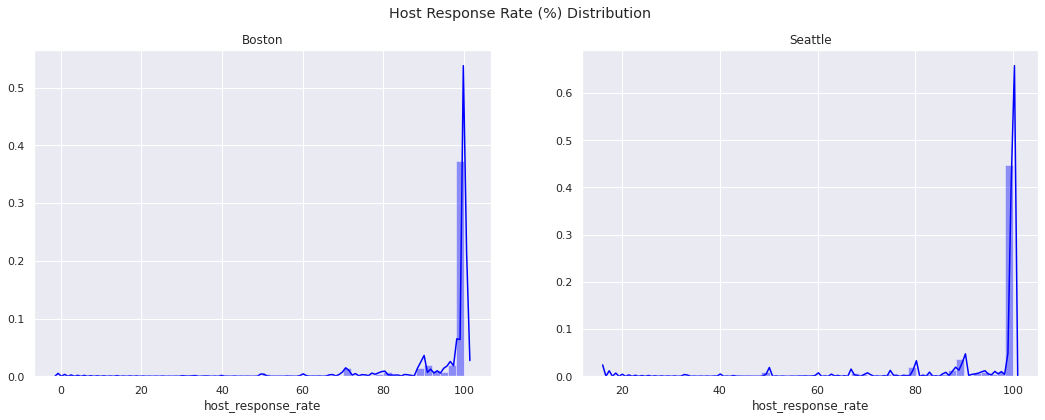

In [16]:
# Ploting a histogram for the response rate
fig,(axis1, axis2) = plt.subplots(1,2, figsize=(18,6))
plt.suptitle('Host Response Rate (%) Distribution')
plt.sca(axis1)
plt.title("Boston")
plt.sca(axis2)
plt.title("Seattle")
sns.distplot(boston_response_rate, color='blue', ax=axis1)
sns.distplot(seattle_response_rate, color='blue', ax=axis2)
plt.show()

In [84]:
# Missing Values (Response Rate - Boston)
boston_df['host_response_rate'].isnull().mean()*100

13.138075313807532

In [85]:
# Missing Values (Response Rate - Seattle)
seattle_df['host_response_rate'].isnull().mean()*100

13.698271346254584

In [74]:
# Percentages of response rate (Boston)
(boston_response_rate.value_counts()/boston_df.shape[0])*100

100.0    57.796374
98.0      5.439331
90.0      2.956764
96.0      2.510460
89.0      2.426778
71.0      1.729428
99.0      1.450488
92.0      1.059972
80.0      1.059972
97.0      1.004184
94.0      0.781032
70.0      0.641562
95.0      0.613668
50.0      0.585774
93.0      0.502092
79.0      0.502092
77.0      0.474198
91.0      0.474198
73.0      0.446304
67.0      0.418410
60.0      0.418410
75.0      0.390516
0.0       0.362622
86.0      0.306834
83.0      0.278940
78.0      0.278940
81.0      0.223152
69.0      0.195258
85.0      0.195258
33.0      0.167364
88.0      0.167364
40.0      0.139470
36.0      0.083682
30.0      0.083682
82.0      0.083682
84.0      0.055788
10.0      0.055788
14.0      0.055788
31.0      0.055788
61.0      0.055788
38.0      0.027894
64.0      0.027894
43.0      0.027894
56.0      0.027894
25.0      0.027894
20.0      0.027894
19.0      0.027894
17.0      0.027894
57.0      0.027894
68.0      0.027894
6.0       0.027894
63.0      0.027894
Name: host_r

In [75]:
# Percentages of response rate (Seattle)
(seattle_response_rate.value_counts()/seattle_df.shape[0])*100

100.0    62.100576
90.0      4.321634
80.0      2.723939
99.0      2.042954
88.0      1.728654
50.0      1.361970
94.0      1.204819
67.0      1.073861
89.0      0.838135
75.0      0.838135
86.0      0.785752
96.0      0.733368
98.0      0.733368
70.0      0.654793
97.0      0.550026
83.0      0.523834
60.0      0.523834
92.0      0.471451
93.0      0.471451
33.0      0.366684
40.0      0.314301
63.0      0.288109
71.0      0.209534
78.0      0.209534
95.0      0.209534
91.0      0.130959
43.0      0.104767
76.0      0.078575
25.0      0.078575
64.0      0.078575
87.0      0.078575
57.0      0.052383
17.0      0.052383
58.0      0.052383
82.0      0.052383
56.0      0.026192
69.0      0.026192
53.0      0.026192
81.0      0.026192
38.0      0.026192
65.0      0.026192
31.0      0.026192
30.0      0.026192
68.0      0.026192
55.0      0.026192
Name: host_response_rate, dtype: float64

**Acceptance Rate**

In [0]:
# Converting the percentage objects to integers (Removing the '%') - Acceptance Rate

# Boston
boston_acceptance_rate = boston_df['host_acceptance_rate'].astype(str)

for i in range(len(boston_acceptance_rate)):
  boston_acceptance_rate[i] = float(boston_acceptance_rate[i].strip('%'))

boston_acceptance_rate = boston_acceptance_rate.dropna()

# Seattle
seattle_acceptance_rate = seattle_df['host_acceptance_rate'].astype(str)

for i in range(len(seattle_acceptance_rate)):
  seattle_acceptance_rate[i] = float(seattle_acceptance_rate[i].strip('%'))

seattle_acceptance_rate = seattle_acceptance_rate.dropna()



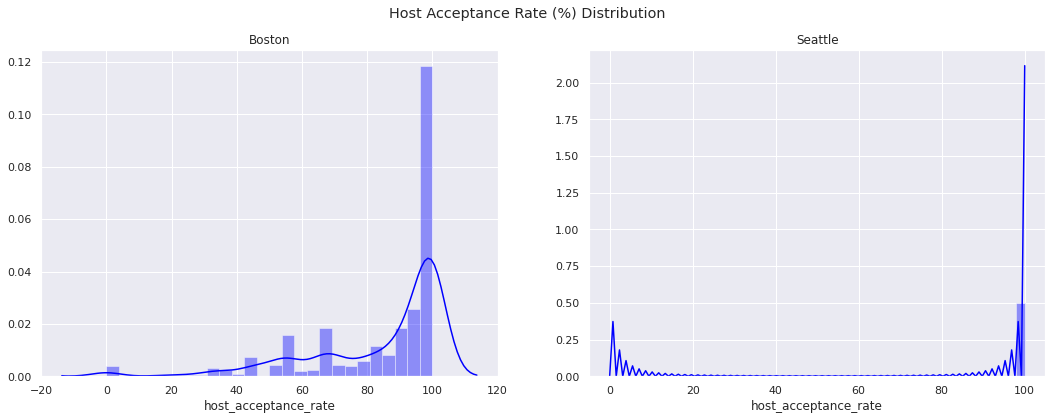

In [18]:
# Ploting a histogram for the acceptance rate
fig,(axis1, axis2) = plt.subplots(1,2, figsize=(18,6))
plt.suptitle('Host Acceptance Rate (%) Distribution')
plt.sca(axis1)
plt.title("Boston")
plt.sca(axis2)
plt.title("Seattle")
sns.distplot(boston_acceptance_rate, color='blue', ax=axis1)
sns.distplot(seattle_acceptance_rate, color='blue', ax=axis2)
plt.show()

In [80]:
boston_df['host_acceptance_rate'].isnull().mean()

0.13138075313807532

In [83]:
seattle_df['host_acceptance_rate'].isnull().mean()

0.20246202200104768

**Verification Methods**

In [0]:
# Checking which verification method is more common in each city

possible_vals = ["email", "phone","facebook","google","jumio","kba","reviews","manual_online",
                 "manual_offline","linkedin","amex","weibo","photographer","None","sent_id" ]

def total_count(df, col1, look_for,nr_listings):

  '''
  INPUTS:
  df - PanDas Dataframe
  col1 - Column of the dataframe in which the function is going to work on
  look_for - Strings we're looking for
  nr_listings - Shape (rows) of the Pandas Dataframe we are working into

  OUTPUT: 
  v_methods_counts - list with the values of occorencies of each string into 'look_for' on 'df'

  The function searches on df[col1] for the strings into look_for, and then stores the number of occorencies into the list v_methods_counts

  '''
  v_methods_counts = []
    #loop through list of ed types
  for val in look_for:
      v_count = 0
        #loop through rows
      for idx in range(df.shape[0]):
            #if the ed type is in the row add 1
          if val in df[col1][idx]:
              v_count += 1
      v_methods_counts.append((v_count/nr_listings)*100)
  return v_methods_counts
    
boston_v_methods_counts = total_count(boston_df,'host_verifications',possible_vals,boston_df.shape[0])
seattle_v_methods_counts = total_count(seattle_df,'host_verifications',possible_vals,seattle_df.shape[0])

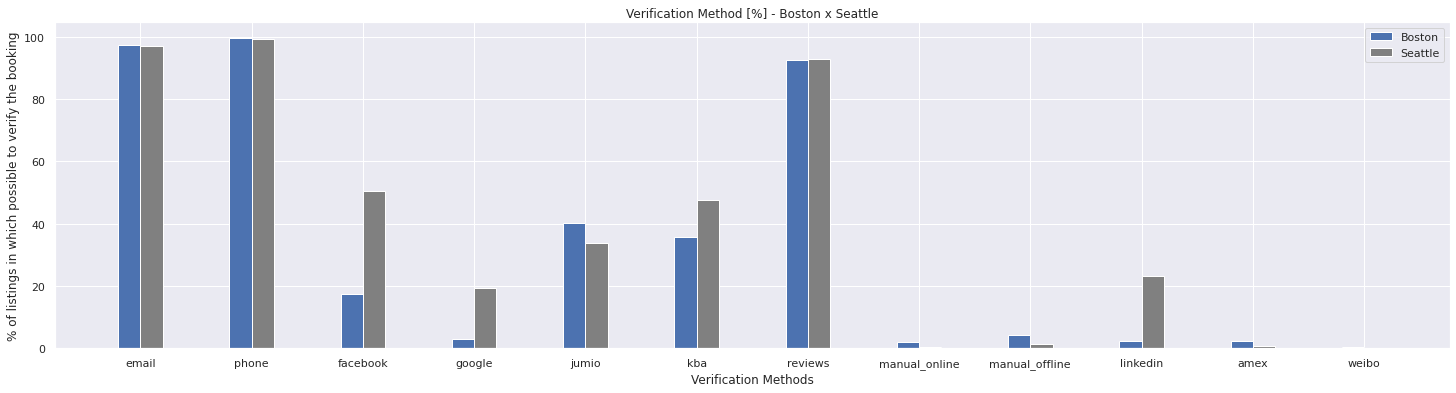

In [12]:
#grouped barplot (Host Verification Methods)

#set the bar width
barWidth_vm = 0.2

#set the position of the bar on the x axis
r1_vm = np.arange(len(boston_v_methods_counts[0:-3]))
r2_vm = [x + barWidth_vm for x in r1_vm]

#Make the plot
plt.figure(figsize=(25,6))
plt.title('Verification Method [%] - Boston x Seattle')
plt.bar(r1_vm, boston_v_methods_counts[0:-3], width=barWidth_vm, edgecolor='white', label='Boston')
plt.bar(r2_vm, seattle_v_methods_counts[0:-3], width=barWidth_vm, color='gray', edgecolor='white', label='Seattle')

# Add title and xticks
plt.xlabel('Verification Methods')
plt.ylabel('% of listings in which possible to verify the booking')
plt.xticks([r + (barWidth_vm/2) for r in range(len(boston_v_methods_counts[0:-3]))],possible_vals[0:-3])

# Add legend and show graph
plt.legend()
plt.show()

**Do the hosts live in the same city as the listed property?**

In [0]:
# Do the hosts live in the same city as the listed property?

def location_count(df, list1, list2):

  '''
  INPUTS:
  df - PanDas Dataframe
  list1 - List of host locations (as str)
  list2 - List of properties' cities (as atr)

  OUTPUT: 
  v_count_loc - counts the number of hosts which live in the same city as the listed property

  The function compares the host location to the property city for the whole dataframe -> if the City is contained into the host's adress,
  v_count_loc is increased.

  '''
  v_count_loc = 0
  for idx in range(df.shape[0]):
    prop_city = list2[idx]
    host_loc = list1[idx]
    if prop_city in host_loc:
      v_count_loc += 1
  return v_count_loc

boston_loc_count = location_count(boston_df,boston_df['host_location'].astype(str),boston_df['city'].astype(str))
seattle_loc_count = location_count(seattle_df,seattle_df['host_location'].astype(str),seattle_df['city'].astype(str))

In [24]:
print("Hosts who live in the same city as the listed property  - Boston: {} % ".format((boston_loc_count/boston_df.shape[0])*100))
print("Hosts who live in the same city as the listed property  - Seattle: {} %".format((seattle_loc_count/seattle_df.shape[0])*100))

Hosts who live in the same city as the listed property  - Boston: 64.88145048814505 % 
Hosts who live in the same city as the listed property  - Seattle: 85.9088528025144 %


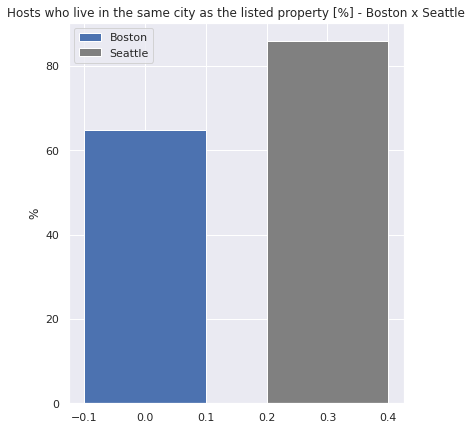

In [25]:
#grouped barplot (Host Location %)

#set the bar width
barWidth_hl = 0.2

#set the position of the bar on the x axis
r1_hl = 0
r2_hl = r1_hl + 1.5*barWidth_hl

#Make the plot
plt.figure(figsize=(6,7))
plt.title('Hosts who live in the same city as the listed property [%] - Boston x Seattle')
plt.bar(r1_hl,((boston_loc_count/boston_df.shape[0])*100), width=barWidth_hl, label='Boston')
plt.bar(r2_hl,((seattle_loc_count/seattle_df.shape[0])*100), width=barWidth_hl, color='gray', label='Seattle')

# Add title and xticks
plt.xlabel('')
plt.ylabel('%')

# Add legend and show graph
plt.legend()
plt.show()

**Cancelation Policy**

In [0]:
# Cancelation Policty Seattle x Boston

# % of response time in each city
boston_canc_pol = (boston_df['cancellation_policy'].value_counts())/boston_df.shape[0]
seatle_canc_pol = (seattle_df['cancellation_policy'].value_counts())/seattle_df.shape[0]

In [27]:
#Boston
boston_canc_pol

strict             0.441283
flexible           0.278661
moderate           0.256346
super_strict_30    0.023710
Name: cancellation_policy, dtype: float64

In [28]:
# Seattle
seatle_canc_pol

strict      0.371137
moderate    0.327658
flexible    0.301205
Name: cancellation_policy, dtype: float64

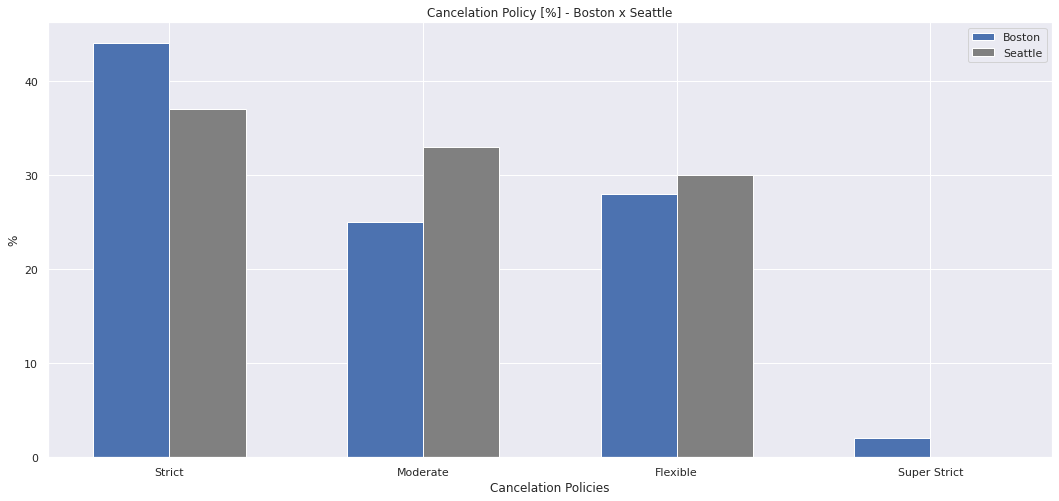

In [14]:
#grouped barplot (Host Verification Methods)

#set the bar width
barWidth_cp = 0.3

#Height of the bars
boston_canc_pol_heights = [44,25,28,2]
seattle_can_pol_heights = [37,33,30,0]

#set the position of the bar on the x axis
r1_cp = np.arange(len(boston_canc_pol_heights))
r2_cp = [x + barWidth_cp for x in r1_cp]

#Make the plot
plt.figure(figsize=(18,8))
plt.title('Cancelation Policy [%] - Boston x Seattle')
plt.bar(r1_cp, boston_canc_pol_heights, width=barWidth_cp, edgecolor='white', label='Boston')
plt.bar(r2_cp, seattle_can_pol_heights, width=barWidth_cp, color='gray', edgecolor='white', label='Seattle')

# Add title and xticks
plt.xlabel('Cancelation Policies')
plt.ylabel('%')
plt.xticks([r + (barWidth_cp/2) for r in range(len(boston_canc_pol_heights))],['Strict','Moderate','Flexible','Super Strict'])

# Add legend and show graph
plt.legend()
plt.show()

# **Question 2 - Which city is cheaper for a one night booking?**





**Which are the most commom property types in each city?**

In [15]:
# % of properties of the specific type - Boston
boston_perc_prop_type = (boston_df['property_type'].value_counts()/boston_df.shape[0])*100
boston_perc_prop_type

Apartment          72.859135
House              15.676430
Condominium         6.443515
Townhouse           1.506276
Bed & Breakfast     1.143654
Loft                1.087866
Other               0.474198
Boat                0.334728
Villa               0.167364
Entire Floor        0.111576
Dorm                0.055788
Camper/RV           0.027894
Guesthouse          0.027894
Name: property_type, dtype: float64

In [16]:
# % of properties of the specific type - Seattle
seattle_perc_prop_type = (seattle_df['property_type'].value_counts()/seattle_df.shape[0])*100
seattle_perc_prop_type

House              45.390257
Apartment          44.735464
Townhouse           3.090623
Condominium         2.383447
Loft                1.047669
Bed & Breakfast     0.969094
Other               0.576218
Cabin               0.550026
Camper/RV           0.340492
Bungalow            0.340492
Boat                0.209534
Tent                0.130959
Treehouse           0.078575
Dorm                0.052383
Chalet              0.052383
Yurt                0.026192
Name: property_type, dtype: float64

In [17]:
# Property Types which are common in both cities
boston_prop_types = boston_df['property_type'].dropna().unique()
seattle_prop_types = seattle_df['property_type'].dropna().unique()

common_prop_types = []
for i in range(len(boston_prop_types)):
  for j in range(len(seattle_prop_types)):
    if boston_prop_types[i] == seattle_prop_types[j]:
      common_prop_types.append(seattle_prop_types[j])

common_prop_types

['House',
 'Apartment',
 'Condominium',
 'Bed & Breakfast',
 'Townhouse',
 'Loft',
 'Boat',
 'Dorm',
 'Other',
 'Camper/RV']

In [18]:
# Boston Exclusive Property Types

boston_exclusive_prop_type = []

for i in range(len(boston_prop_types)):
  count = 0
  for j in range(len(common_prop_types)):
    if boston_prop_types[i] == common_prop_types[j]:
      count = count + 1
  if count == 0:
    boston_exclusive_prop_type.append(boston_prop_types[i])

boston_exclusive_prop_type

['Villa', 'Entire Floor', 'Guesthouse']

In [19]:
# Seattle Exclusive Property Types

seattle_exclusive_prop_type = []

for i in range(len(seattle_prop_types)):
  count = 0
  for j in range(len(common_prop_types)):
    if seattle_prop_types[i] == common_prop_types[j]:
      count = count + 1
  if count == 0:
    seattle_exclusive_prop_type.append(seattle_prop_types[i])

seattle_exclusive_prop_type

['Cabin', 'Bungalow', 'Treehouse', 'Yurt', 'Chalet', 'Tent']

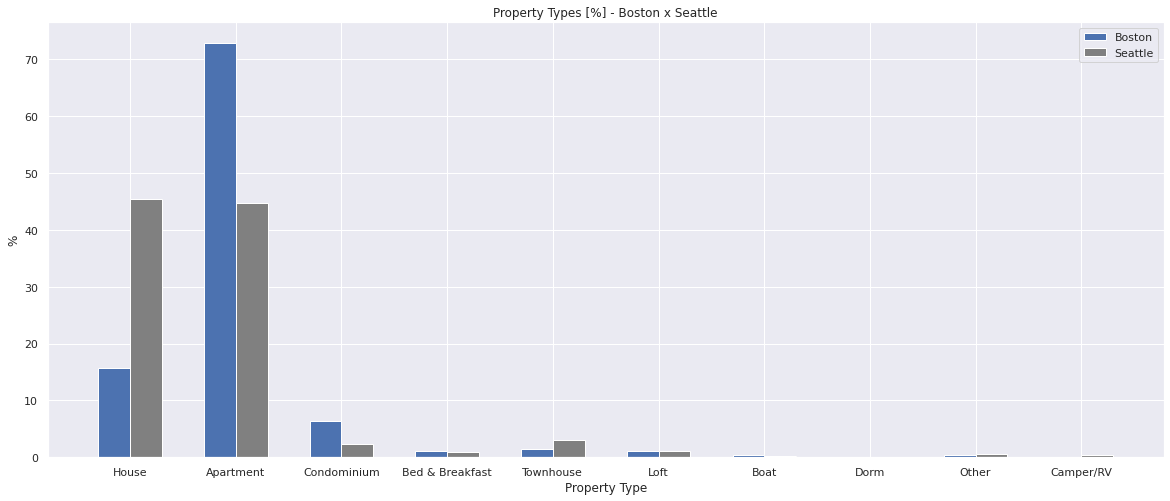

In [22]:
#grouped barplot (Property Types)


# Bar heights
boston_common_perc_prop_type = []
seattle_common_perc_prop_type = []

for val in common_prop_types:
  boston_common_perc_prop_type.append(boston_perc_prop_type[val])
  seattle_common_perc_prop_type.append(seattle_perc_prop_type[val])



#set the bar width
barWidth_pt = 0.3


#set the position of the bar on the x axis
r1_pt = np.arange(len(seattle_common_perc_prop_type))
r2_pt = [x + barWidth_cp for x in r1_pt]

#Make the plot
plt.figure(figsize=(20,8))
plt.title('Property Types [%] - Boston x Seattle')
plt.bar(r1_pt, boston_common_perc_prop_type, width=barWidth_pt, edgecolor='white', label='Boston')
plt.bar(r2_pt, seattle_common_perc_prop_type, width=barWidth_pt, color='gray', edgecolor='white', label='Seattle')

# Add title and xticks
plt.xlabel('Property Type')
plt.ylabel('%')
plt.xticks([r + (barWidth_pt/2) for r in range(len(boston_common_perc_prop_type))],common_prop_types)

# Add legend and show graph
plt.legend()
plt.show()


Room Type

In [50]:
boston_room_type = (boston_df['room_type'].value_counts()/boston_df.shape[0])*100
boston_room_type

Entire home/apt    59.330544
Private room       38.437936
Shared room         2.231520
Name: room_type, dtype: float64

In [51]:
seattle_room_type = (seattle_df['room_type'].value_counts()/seattle_df.shape[0])*100
seattle_room_type

Entire home/apt    66.553169
Private room       30.382399
Shared room         3.064432
Name: room_type, dtype: float64

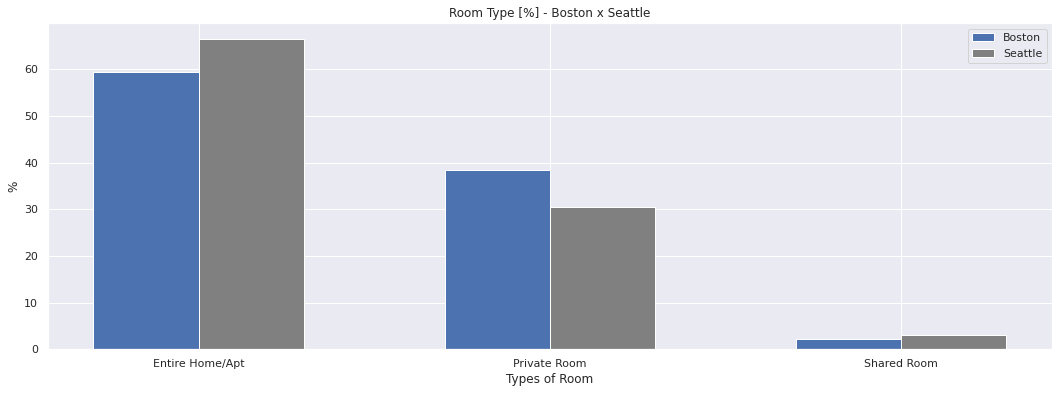

In [52]:
#grouped barplot (Host Verification Methods)

#set the bar width
barWidth_rt = 0.3

#set the position of the bar on the x axis
r1_rt = np.arange(len(boston_room_type))
r2_rt = [x + barWidth_rt for x in r1_rt]

#Make the plot
plt.figure(figsize=(18,6))
plt.title('Room Type [%] - Boston x Seattle')
plt.bar(r1_rt, boston_room_type, width=barWidth_rt, edgecolor='white', label='Boston')
plt.bar(r2_rt, seattle_room_type, width=barWidth_rt, color='gray', edgecolor='white', label='Seattle')

# Add title and xticks
plt.xlabel('Types of Room')
plt.ylabel('%')
plt.xticks([r + (barWidth/2) for r in range(len(seattle_room_type))],['Entire Home/Apt','Private Room','Shared Room'])

# Add legend and show graph
plt.legend()
plt.show()

Prices

In [0]:
# Create a checkpoint to modify our datasets

mod_boston_df = boston_df.copy()
mod_seattle_df = seattle_df.copy()

In [25]:
# Missing Values in the column Price
boston_df['price'].isnull().sum()

0

In [0]:
# Converting Prices ( Objects -> Float) and then dropping the "$"

import locale

locale.setlocale(locale.LC_ALL, 'en_US.UTF8')

# Boston
boston_price = boston_df['price'].astype(str)

for i in range(len(boston_price)):
  boston_price[i] = locale.atof(boston_price[i].strip("$"))

# Seattle
seattle_price = seattle_df['price'].astype(str)

for i in range(len(seattle_price)):
  seattle_price[i] = locale.atof(seattle_price[i].strip("$"))

# Swapping the orinal columns for the converted ones
mod_boston_df = mod_boston_df.drop('price', axis=1)
mod_seattle_df = mod_seattle_df.drop('price', axis=1)
mod_boston_df['price'] = boston_price.astype(int)
mod_seattle_df['price'] = seattle_price.astype(int)

In [0]:
# Prices by property type in Boston and Seattle
boston_prices_type = mod_boston_df.groupby('property_type')['price'].mean().sort_values(ascending=False)
seattle_prices_type = mod_seattle_df.groupby('property_type')['price'].mean().sort_values(ascending=False)

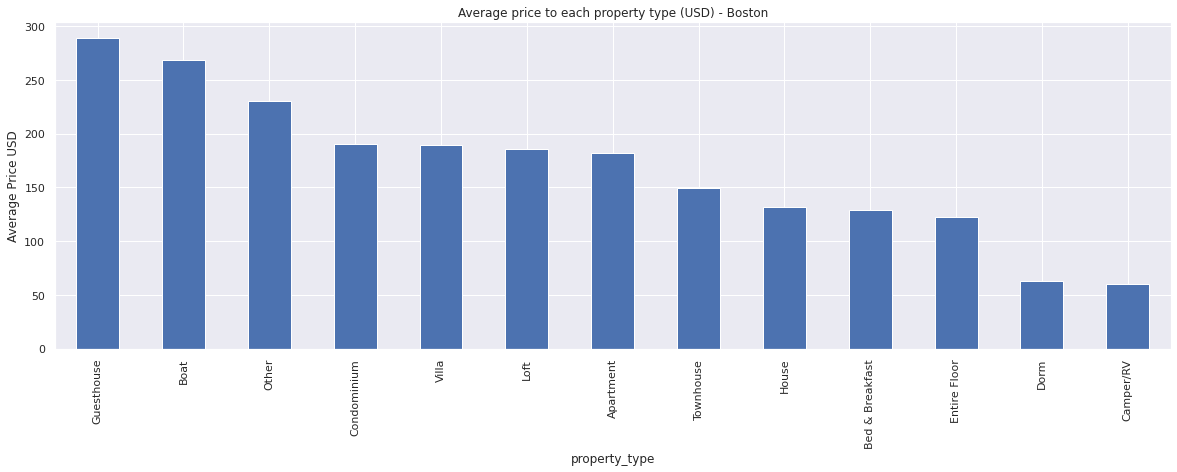

In [28]:
# Which type of property is more expensive? Boston
plt.figure(figsize=(20,6));
plt.title('Average price to each property type (USD) - Boston')
plt.xlabel('Property Type')
plt.ylabel('Average Price USD')
boston_prices_type.plot.bar();

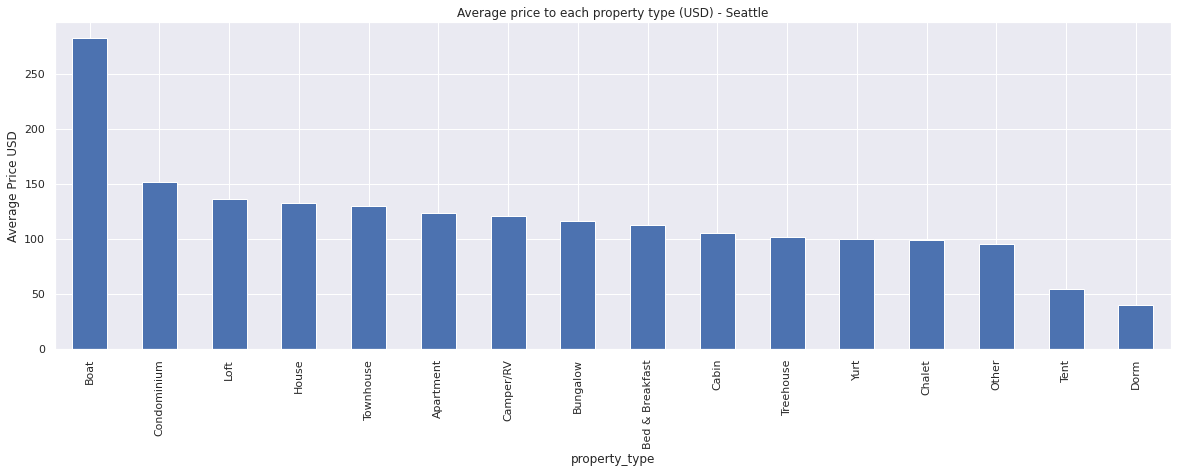

In [29]:
# Which type of property is more expensive? Seattle
plt.figure(figsize=(20,6));
plt.title('Average price to each property type (USD) - Seattle')
plt.xlabel('Property Type')
plt.ylabel('Average Price USD')
seattle_prices_type.plot.bar();

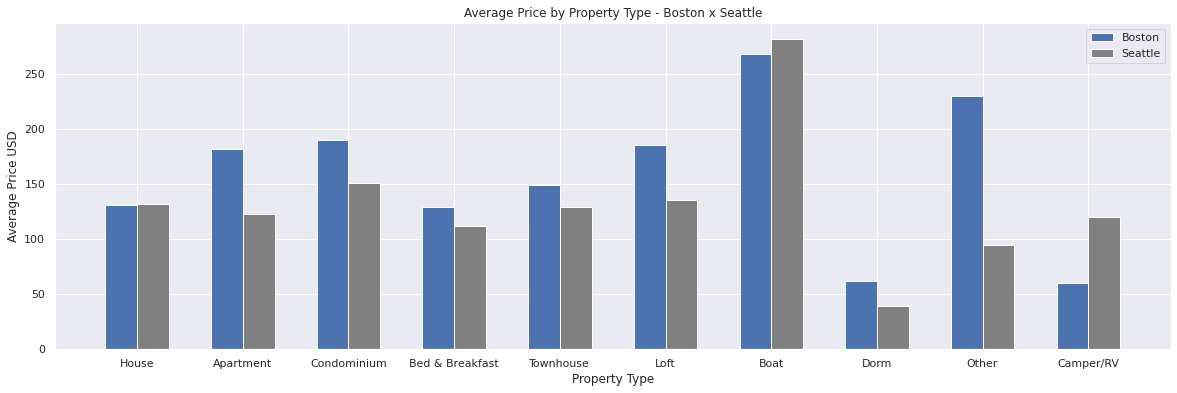

In [32]:
# Comparing prices for types of property - Boston x Seattle

#grouped barplot (Property Types)


# Bar heights
boston_common_price_prop_type = []
seattle_common_price_prop_type = []

for val in common_prop_types:
  boston_common_price_prop_type.append(boston_prices_type[val])
  seattle_common_price_prop_type.append(seattle_prices_type[val])



#set the bar width
barWidth_hp = 0.3


#set the position of the bar on the x axis
r1_hp = np.arange(len(seattle_common_perc_prop_type))
r2_hp = [x + barWidth_cp for x in r1_hp]

#Make the plot
plt.figure(figsize=(20,6))
plt.title('Average Price by Property Type - Boston x Seattle')
plt.bar(r1_hp, boston_common_price_prop_type, width=barWidth_hp, edgecolor='white', label='Boston')
plt.bar(r2_hp, seattle_common_price_prop_type, width=barWidth_hp, color='gray', edgecolor='white', label='Seattle')

# Add title and xticks
plt.xlabel('Property Type')
plt.ylabel('Average Price USD')
plt.xticks([r + (barWidth_hp/2) for r in range(len(boston_common_price_prop_type))],common_prop_types)

# Add legend and show graph
plt.legend()
plt.show()

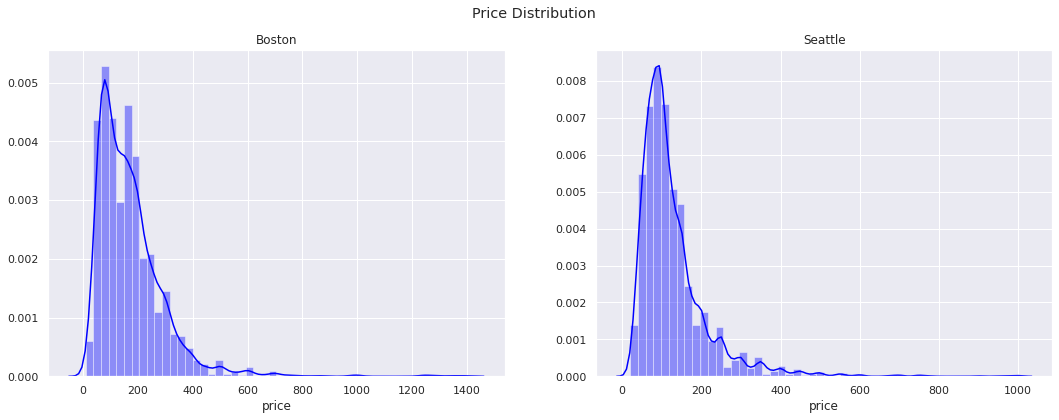

In [87]:
# Ploting a histogram for the rating score

#It looks like there's an outlier on the Boston prices - I'm going to remove it to plot the histogram
boston_prices_fixed = mod_boston_df['price'][mod_boston_df['price']<3000]


fig,(axis1, axis2) = plt.subplots(1,2, figsize=(18,6))
plt.suptitle('Price Distribution')
plt.sca(axis1)
plt.title("Boston")
plt.sca(axis2)
plt.title("Seattle")
sns.distplot(boston_prices_fixed, color='blue', ax=axis1)
sns.distplot(mod_seattle_df['price'], color='blue', ax=axis2)
plt.show()

# **Question 3 - Which city has the best properties available (based on the guest reviews)?**

**List of all the features which are reviewed by the guests**

In [0]:
 # List of all the scores given
scores = ['review_scores_rating','review_scores_accuracy','review_scores_cleanliness',
          'review_scores_checkin','review_scores_communication','review_scores_location','review_scores_value']

**Checking for missing values**

In [34]:
# Missing values
for val in scores:
  missing_boston = boston_df[val].isnull().mean()
  missing_seattle = seattle_df[val].isnull().mean()
  print(" Feature : {}".format(val))
  print(" \t Boston - Missing Values: {:.2f} % \n \t Seattle - Missing Values: {:.2f} % \n".format(missing_boston*100,missing_seattle*100))

 Feature : review_scores_rating
 	 Boston - Missing Values: 22.68 % 
 	 Seattle - Missing Values: 16.95 % 

 Feature : review_scores_accuracy
 	 Boston - Missing Values: 22.96 % 
 	 Seattle - Missing Values: 17.23 % 

 Feature : review_scores_cleanliness
 	 Boston - Missing Values: 22.82 % 
 	 Seattle - Missing Values: 17.10 % 

 Feature : review_scores_checkin
 	 Boston - Missing Values: 22.87 % 
 	 Seattle - Missing Values: 17.23 % 

 Feature : review_scores_communication
 	 Boston - Missing Values: 22.82 % 
 	 Seattle - Missing Values: 17.05 % 

 Feature : review_scores_location
 	 Boston - Missing Values: 22.93 % 
 	 Seattle - Missing Values: 17.16 % 

 Feature : review_scores_value
 	 Boston - Missing Values: 22.90 % 
 	 Seattle - Missing Values: 17.18 % 



There are too many missing values in each feature, then dropping all the rows in which we have missing values would lead us to a very short dataset.

Instead, I'm going to fill the missing values with the mean value of each feature.

In [0]:
# Filling the empty values with the mean of each type of score

for val in scores:
  mod_boston_df[val].fillna((mod_boston_df[val].mean()), inplace=True)
  mod_seattle_df[val].fillna((mod_seattle_df[val].mean()), inplace=True)

**Reviews Score**

In [0]:
# Average rating to each category - Boston x Seattle

avg_rating_boston = []
avg_rating_seattle = []
for val in scores:
  avg_rating_boston.append(mod_boston_df[val].mean(axis=0))
  avg_rating_seattle.append(mod_seattle_df[val].mean(axis=0))



In [37]:
#Average ratings in Boston
avg_rating_boston

[91.91666666666674,
 9.43157132512681,
 9.25804119985562,
 9.646292947558926,
 9.646548608601448,
 9.41404270720224,
 9.168234442836601]

In [38]:
#Average ratings in Seattle
avg_rating_seattle

[94.53926206244176,
 9.636392405063283,
 9.556398104265357,
 9.78670886075955,
 9.809598989580111,
 9.608915586468513,
 9.45224541429463]

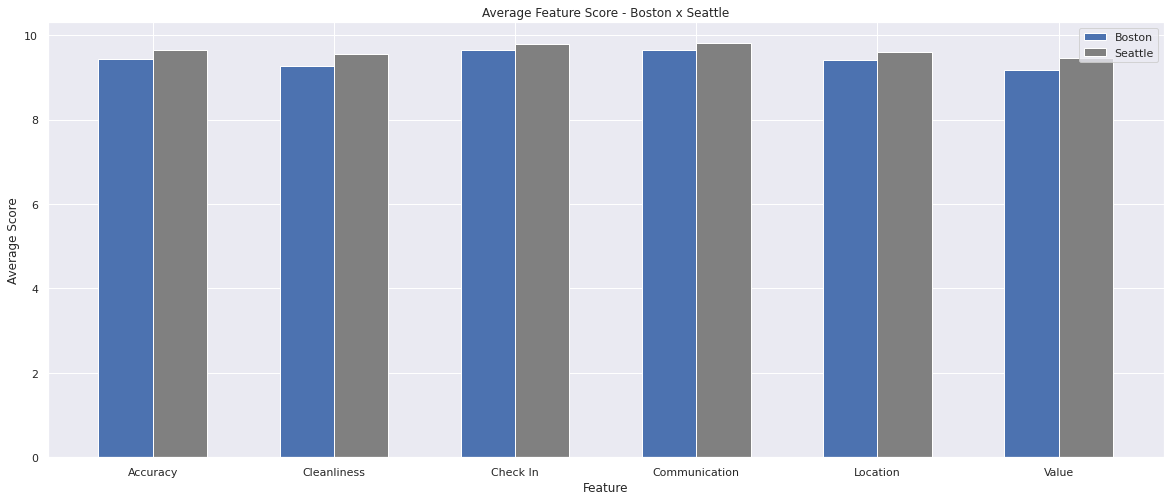

In [42]:
#grouped barplot (Scores)

#set the bar width
barWidth_sr = 0.3


#set the position of the bar on the x axis
r1_sr = np.arange(len(avg_rating_seattle[1:7]))
r2_sr = [x + barWidth_cp for x in r1_sr]

#Make the plot
plt.figure(figsize=(20,8))
plt.title('Average Feature Score - Boston x Seattle')
plt.bar(r1_sr, avg_rating_boston[1:7], width=barWidth_hp, edgecolor='white', label='Boston')
plt.bar(r2_sr, avg_rating_seattle[1:7], width=barWidth_hp, color='gray', edgecolor='white', label='Seattle')

# Add title and xticks
plt.xlabel('Feature')
plt.ylabel('Average Score')
plt.xticks([r + (barWidth_sr/2) for r in range(len(avg_rating_seattle[1:7]))],['Accuracy', 'Cleanliness','Check In','Communication','Location','Value'])

# Add legend and show graph
plt.legend()
plt.show()

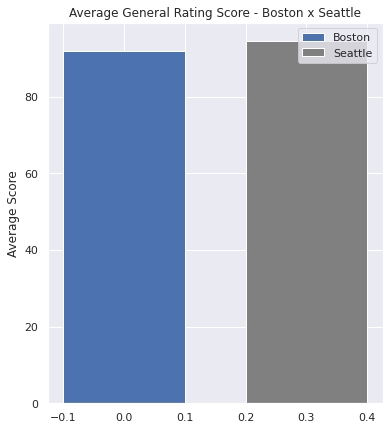

In [96]:
#grouped barplot (General Rating Score)

#set the bar width
barWidth_hl = 0.2

#set the position of the bar on the x axis
r1_hl = 0
r2_hl = r1_hl + 1.5*barWidth_hl

#Make the plot
plt.figure(figsize=(6,7))
plt.title('Average General Rating Score - Boston x Seattle')
plt.bar(r1_hl,avg_rating_boston[0], width=barWidth_hl, label='Boston')
plt.bar(r2_hl,avg_rating_seattle[0], width=barWidth_hl, color='gray', label='Seattle')

# Add title and xticks
plt.xlabel('')
plt.ylabel('Average Score')

# Add legend and show graph
plt.legend()
plt.show()

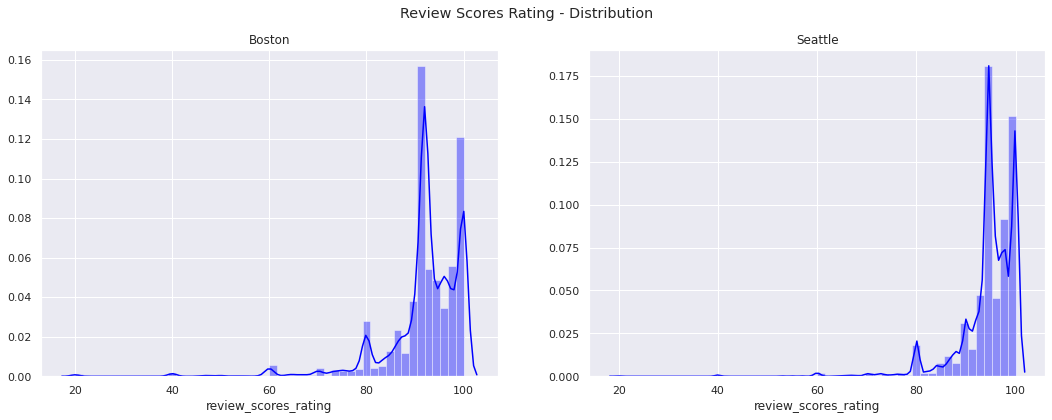

In [97]:
# Ploting a histogram for the rating score
fig,(axis1, axis2) = plt.subplots(1,2, figsize=(18,6))
plt.suptitle('Review Scores Rating - Distribution')
plt.sca(axis1)
plt.title("Boston")
plt.sca(axis2)
plt.title("Seattle")
sns.distplot(mod_boston_df['review_scores_rating'], color='blue', ax=axis1)
sns.distplot(mod_seattle_df['review_scores_rating'], color='blue', ax=axis2)
plt.show()

In [0]:
# average rating per property type
avg_rating_prop_type_boston = mod_boston_df.groupby('property_type')['review_scores_rating'].mean()
avg_rating_prop_type_seattle = mod_seattle_df.groupby('property_type')['review_scores_rating'].mean()

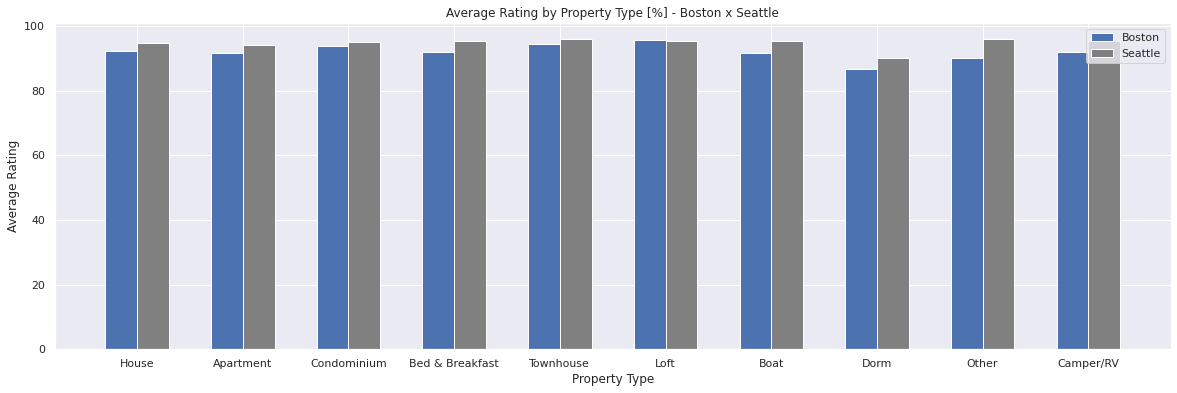

In [46]:
# Comparing rating for  types of property - Boston x Seattle

#grouped barplot (Rating by property type)

# Bar heights
boston_common_rating_prop_type = []
seattle_common_rating_prop_type = []

for val in common_prop_types:
  boston_common_rating_prop_type.append(avg_rating_prop_type_boston[val])
  seattle_common_rating_prop_type.append(avg_rating_prop_type_seattle[val])

#set the bar width
barWidth_st = 0.3

#set the position of the bar on the x axis
r1_st = np.arange(len(boston_common_rating_prop_type))
r2_st = [x + barWidth_cp for x in r1_st]

#Make the plot
plt.figure(figsize=(20,6))
plt.title('Average Rating by Property Type [%] - Boston x Seattle')
plt.bar(r1_st, boston_common_rating_prop_type, width=barWidth_st, edgecolor='white', label='Boston')
plt.bar(r2_st, seattle_common_rating_prop_type, width=barWidth_st, color='gray', edgecolor='white', label='Seattle')

# Add title and xticks
plt.xlabel('Property Type')
plt.ylabel('Average Rating')
plt.xticks([r + (barWidth_st/2) for r in range(len(boston_common_rating_prop_type))],common_prop_types)

# Add legend and show graph
plt.legend()
plt.show()